In [1]:
import matplotlib.pyplot as plt
import numpy as np

from thermohl import solver

This function plots conductor temperatures (surface, average and core) when a step of transit occurs. Simulation made with the 3t solver and RTE power terms. 

In [9]:
def example_solver3t_transient(dic):
    fig, ax = plt.subplots(nrows=2, ncols=1)
    slvr = solver.olla(dic, heateq="3t")
    df_temp = slvr.steady_temperature()
    T_surf = df_temp['t_surf'].values
    T_core = df_temp['t_core'].values
    T2_surf = slvr.transient_temperature(t, Ts0=np.array(T_surf[0]), Tc0=np.array(T_core[0]))['t_surf']
    T2_core = slvr.transient_temperature(t, Ts0=np.array(T_surf[0]), Tc0=np.array(T_core[0]))['t_core']
    ax[0].plot(t, T_surf, "-", c="C0", label="%s - steady-surf" )
    ax[1].plot(t, T_core, "-", c="C1", label="%s - steady-core" )
    ax[0].plot(t, T2_surf, "--", c="C0", label="%s - transient-surf" )
    ax[1].plot(t, T2_core, "--", c="C1", label="%s - transient-core" )
    ax[0].grid(True)
    ax[1].grid(True)
    #plt.plot(t, I[:, 0])
    ax[1].set_xlabel("Time (s)")
    ax[0].set_xlabel("Time (s)")
    ax[1].set_ylabel("Temperature (C)")
    ax[0].set_ylabel("Temperature (C)")
    %matplotlib inline
    plt.show()

In [10]:
import matplotlib

matplotlib.use("TkAgg")
plt.close("all")
t = np.linspace(0.0, 7200.0, 24)
dic = dict(
    lat=46.1,
    alt=123.,
    azm=31.,
    month=6,
    day=20,
    hour=np.linspace(0., 23., 24),
    I=np.array([400. for i in range(12)] + [700. for i in range(12)]),
)  

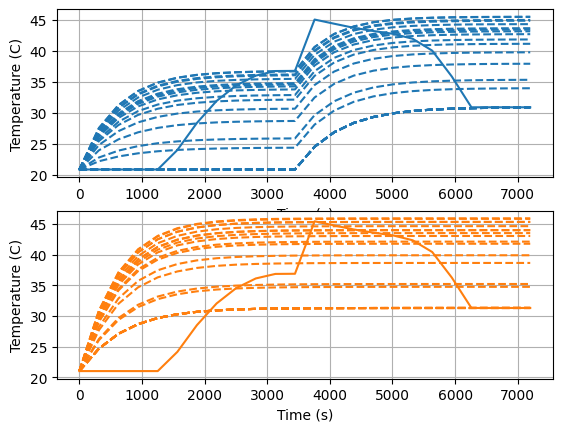

In [11]:
example_solver3t_transient(dic)